In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('height-weight.csv')
df = df.rename(columns={'Height(Inches)': 'Height', 'Weight(Pounds)': 'weight'})
del df['Index']

In [17]:
df.head()

,Height,weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


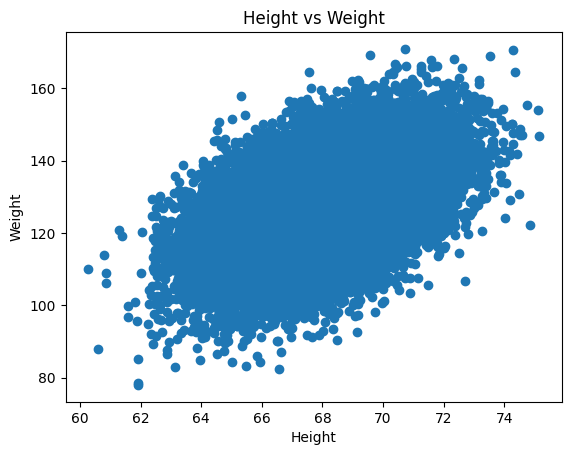

In [18]:
plt.scatter(df['Height'], df['weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  25000 non-null  float64
 1   weight  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [20]:
df.describe()

,Height,weight
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [21]:
df.isnull().sum()

,0
Height,0
weight,0


In [22]:
#divide into dependent and independent features

X = df[['weight']] ##independent

y = df[['Height']] ##dependent


In [23]:
X.shape,y.shape

((25000, 1), (25000, 1))

In [24]:
# divide into train-test :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17500, 1), (7500, 1), (17500, 1), (7500, 1))

In [26]:
##standrard scaler:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [27]:
  X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

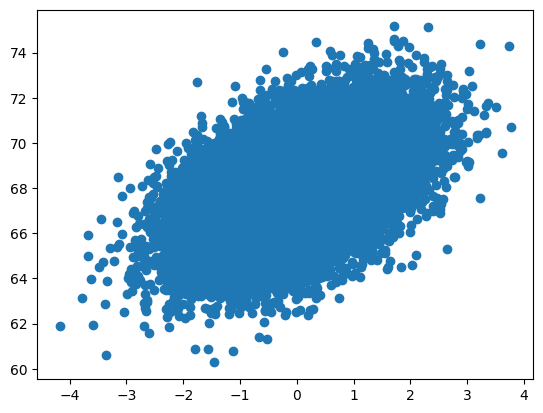

In [29]:
plt.scatter(X_train, y_train)

In [30]:
##Model training

from sklearn.linear_model import LinearRegression


In [31]:
regressor = LinearRegression()

In [32]:
##training the train data:
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
regressor.coef_

array([[0.94694738]])

In [34]:
regressor.intercept_

array([67.99666177])

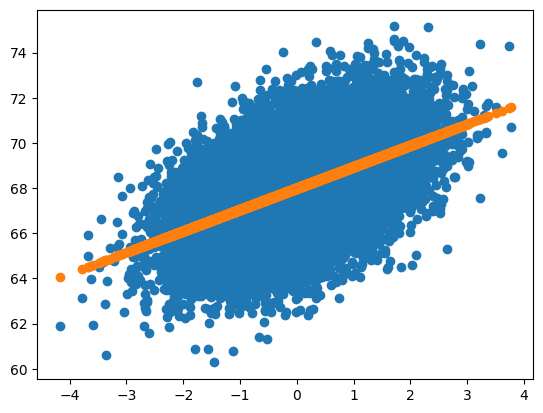

In [37]:
plt.scatter(X_train, y_train)
plt.scatter(X_train,regressor.predict(X_train))

Prediction of train data:

1. predicted height output = intercept + coeff(Weights)
2. y_pred_train = 69.99 + 0.94(X_train)

Prdiction of test data:
1. predicted height output = intercept + coeff(Weights)
2. y_pred_test = 69.99 + 0.94(X_test)


In [39]:
##predict for test data:
y_pred_test = regressor.predict(X_test)

In [40]:
y_pred_test

array([[68.58456788],
       [66.76690185],
       [68.72314732],
       ...,
       [67.94734355],
       [68.642122  ],
       [66.73928532]])

In [41]:
y_test

,Height
6868,68.42447
24016,67.89663
9668,67.65922
13640,69.01299
14018,69.01055
...,...
21156,67.75061
24654,68.06416
14592,65.10865
20160,70.12934


In [43]:
##performance matrix: MAE MSE RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [44]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

In [45]:
mse, mae, rmse

(2.7260408608752855, 1.3135652690988477, 1.651072639490851)

In [46]:
## Accuracy of the model: R squared and adjusted R square:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [47]:
score

0.259528312037243

In [48]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.25942955614394303